<a href="https://colab.research.google.com/github/bhernandeza5/Challenge_TelecomX/blob/main/challenge_telecom_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge TelecomX Parte 1

Churn de clientes por alta tasa de cancelaciones.

## Extracción y normalización de datos

In [89]:
#importe de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import ttest_ind

In [90]:
#Datos directamente desde la API
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

#Conversión de datos a dataframe
df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


* Como los datos vienen en formato anidado json, se deben normalizar por cada columna.
* El archivo es muy grande para utilizar json crack.

In [91]:
#Normalizar los datos

customer = pd.json_normalize(df["customer"])
phone = pd.json_normalize(df["phone"])
internet = pd.json_normalize(df["internet"])
account = pd.json_normalize(df["account"])

#crear un único df
df_merged = pd.concat([df[["customerID", "Churn"]], customer, phone, internet, account], axis=1)

### 📥 Extracción y normalización de datos

En esta sección se realizó la carga de datos desde un archivo `.json` ubicado en un repositorio público de GitHub. El archivo contenía información de clientes de la empresa **Telecom X**, con datos anidados en columnas como `customer`, `phone`, `internet` y `account`.

#### ✅ Pasos realizados:

1. **Carga del archivo desde GitHub**
   - Se utilizó la URL RAW del archivo JSON para poder leerlo correctamente con `pandas.read_json()`.

2. **Normalización de columnas anidadas**
   - Las columnas `customer`, `phone`, `internet` y `account` estaban en formato diccionario (`dict`).
   - Se utilizó `pd.json_normalize()` sobre cada una de ellas para desanidar los campos y convertirlos en columnas planas.

3. **Unión de las columnas**
   - Se concatenaron las columnas normalizadas con las columnas no anidadas (`customerID` y `Churn`) usando `pd.concat(axis=1)` para construir un único DataFrame con toda la información estructurada.

#### 🧱 Resultado:
Se obtuvo un DataFrame plano y listo para limpieza, exploración y análisis, manteniendo toda la información contenida en los objetos anidados originales.


## Transformación de los datos
### Limpieza y verificación del tipo de datos

In [92]:
#conocer los datos
df_merged.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3401,4712-AUQZO,No,Male,0,No,No,18,No,No phone service,DSL,...,No,Yes,No,No,No,Month-to-month,No,Mailed check,33.60,550.35
1276,1837-YQUCE,No,Female,0,No,No,70,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),58.35,4214.25
6809,9391-EOYLI,Yes,Male,1,Yes,No,12,Yes,No,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.45,950.2
6377,8757-TFHHJ,No,Male,0,No,No,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.80,49.8
2017,2848-YXSMW,No,Male,0,Yes,Yes,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.40,1363.25


In [93]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [94]:
#Cambiar el tipo de datos
df_merged["Churn"].unique()
df_merged[df_merged["Churn"] == '']

#df_merged['Churn']=df_merged["Churn"].map({"No": 0, "Yes": 1}).astype(int)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [95]:
# Como existen datos que no están definidos en la columna churn (' '), vamos a omitirlos del análisis

df_churn = df_merged[df_merged["Churn"] != ''].copy()
df_churn["Churn"] = df_churn["Churn"].map({"No": 0, "Yes": 1}).astype(int)

# Ahora para el resto de las columnas, miremos lo datos únicos para verificar que no hayan datos mal escritos
for col in df_churn.columns:
    print(f"\n * Columna: {col}")
    print(df_churn[col].unique())



 * Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

 * Columna: Churn
[0 1]

 * Columna: gender
['Female' 'Male']

 * Columna: SeniorCitizen
[0 1]

 * Columna: Partner
['Yes' 'No']

 * Columna: Dependents
['Yes' 'No']

 * Columna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

 * Columna: PhoneService
['Yes' 'No']

 * Columna: MultipleLines
['No' 'Yes' 'No phone service']

 * Columna: InternetService
['DSL' 'Fiber optic' 'No']

 * Columna: OnlineSecurity
['No' 'Yes' 'No internet service']

 * Columna: OnlineBackup
['Yes' 'No' 'No internet service']

 * Columna: DeviceProtection
['No' 'Yes' 'No internet service']

 * Columna: TechSupport
['Yes' 'No' 'No internet service']

 * Columna: StreamingTV
['Yes' 'No' 'No internet service']

 * Columna: Stre

In [96]:
# Cambiar el tipo de dato en Charges.Total

# 1) Convertir a string y limpiar espacios
df_churn["Charges.Total"] = df_churn["Charges.Total"].astype(str).str.strip()

# 2) Reemplazar vacíos o solo-espacios por NaN
df_churn["Charges.Total"] = df_churn["Charges.Total"].replace(r'^\s*$', np.nan, regex=True)

# 3) Convertir a numérico, forzando lo que no se pueda a NaN
df_churn["Charges.Total"] = pd.to_numeric(df_churn["Charges.Total"], errors="coerce")

# Revisar resultado
print(df_churn["Charges.Total"].dtype)
print("Valores nulos en Charges.Total:", df_churn["Charges.Total"].isna().sum())

float64
Valores nulos en Charges.Total: 11


In [97]:
# Tratar los valores nulos para el modelado (part 2)
df_churn["Charges.Total"] = df_churn["Charges.Total"].fillna(df_churn["Charges.Total"].median())


In [98]:
# Cambiar el tipo a las otras columnas categóricas

categorical_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod" ]
df_churn[categorical_cols] = df_churn[categorical_cols].astype("category")

In [99]:
#Verificamos los tipos de columnas
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Churn             7043 non-null   int64   
 2   gender            7043 non-null   category
 3   SeniorCitizen     7043 non-null   int64   
 4   Partner           7043 non-null   category
 5   Dependents        7043 non-null   category
 6   tenure            7043 non-null   int64   
 7   PhoneService      7043 non-null   category
 8   MultipleLines     7043 non-null   category
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   category
 11  OnlineBackup      7043 non-null   category
 12  DeviceProtection  7043 non-null   category
 13  TechSupport       7043 non-null   category
 14  StreamingTV       7043 non-null   category
 15  StreamingMovies   7043 non-null   category
 16  Contract          7043 non-nu

### 🔍 Limpieza y verificación de tipos de datos

En esta sección realizamos una revisión y limpieza detallada del dataset `df_churn` para dejarlo listo para análisis descriptivo. El objetivo fue garantizar que cada columna tenga el tipo de dato adecuado y que no haya inconsistencias que afecten los cálculos o visualizaciones.

#### ✅ Pasos realizados:

1. **Inspección de valores únicos**
   - Se utilizó un bucle con `unique()` para revisar los valores presentes en cada columna.
   - Esto permitió identificar entradas problemáticas como cadenas vacías (`''`) o espacios (`' '`), especialmente en `Charges.Total` y `Churn`.

2. **Conversión de `Churn` a valor binario**
   - Se filtraron los registros con `Churn` vacío (`''`) para evitar errores.
   - Se aplicó un mapeo: `"No"` → `0`, `"Yes"` → `1`, seguido de conversión a tipo `int`.

3. **Revisión y limpieza de `Charges.Total`**
   - Se eliminaron espacios usando `.str.strip()`.
   - Se reemplazaron entradas vacías por `NaN`.
   - Se convirtió la columna a `float` con `pd.to_numeric`.
   - Se eliminaron filas con valores faltantes en esta variable.

4. **Conversión de columnas categóricas**
   - Se identificaron columnas que representan categorías (ej: `gender`, `Contract`, `PaymentMethod`).
   - Estas columnas fueron convertidas a tipo `category` para mejorar el rendimiento y facilitar el análisis.

5. **Validación final de tipos**
   - Se utilizó `.info()` para verificar que todas las variables numéricas estén como `int64` o `float64`, y las categóricas como `category`.

#### 🧼 Resultado:
El DataFrame `df_churn` quedó limpio, con tipos de datos adecuados y sin valores atípicos en las columnas clave. Está listo para análisis descriptivo, exploración de evasión de clientes y visualizaciones por categoría o variable numérica.



### Creación de la columna `Cuentas_Diarias`

In [100]:
df_churn["Cuentas_Diarias"] = df_churn["Charges.Monthly"] / 30
df_churn[["customerID", "Charges.Monthly", "Cuentas_Diarias"]].sample(5)

,customerID,Charges.Monthly,Cuentas_Diarias
5879,8039-EQPIM,60.25,2.008333
4835,6620-HVDUJ,60.45,2.015000
2350,3276-HDUEG,75.05,2.501667
1047,1465-VINDH,102.10,3.403333
3649,5027-YOCXN,110.05,3.668333


## Carga y Análisis

### Análisis descriptivo

In [101]:
df_churn.describe()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,32.371149,64.761692,2281.916928,2.158723
std,0.441561,0.368612,24.559481,30.090047,2265.270398,1.003002
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,9.000000,35.500000,402.225000,1.183333
50%,0.000000,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


### 📈 Análisis descriptivo de variables numéricas

Se utilizó el método `.describe()` para obtener estadísticas básicas de las variables cuantitativas más importantes del dataset. Esto permitió tener una primera visión de las tendencias generales de los clientes.

#### 🔹 Variables analizadas:
- `Churn`: variable binaria que indica si el cliente canceló o no. La tasa general de evasión es del 26.5%.
- `SeniorCitizen`: solo el 16% de los clientes son adultos mayores (mayores de 65 años).
- `tenure`: duración del contrato en meses. Hay clientes nuevos (0 meses) y clientes muy antiguos (hasta 72 meses), con una mediana de 29.
- `Charges.Monthly`: el gasto mensual promedio es de \$64.76, pero con alta dispersión.
- `Charges.Total`: el valor acumulado pagado por cliente llega hasta los \$8684.
- `Cuentas_Diarias`: se creó esta nueva variable para observar el gasto diario promedio por cliente. Se sitúa alrededor de \$2.16/día.

#### ✅ Conclusión:
El análisis permite identificar que hay perfiles diversos de clientes: desde nuevos con bajo gasto hasta antiguos con alto valor total. Esta variabilidad es clave para entender mejor quiénes cancelan el servicio y por qué.


### Distribución de evasión general y por categoría

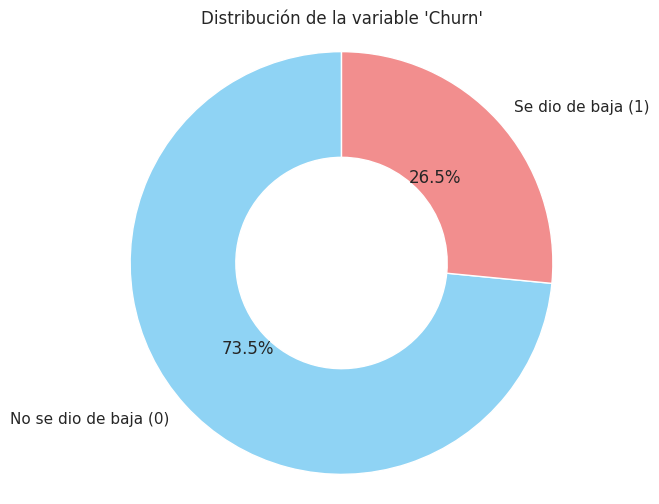

In [102]:
'''Distribución de evasión general'''
# Contamos la cantidad de clientes por clase de evasión
churn_counts = df_churn['Churn'].value_counts()
labels = ['No se dio de baja (0)', 'Se dio de baja (1)']
colors = ['#8fd3f4','#f28e8e']

# Creamos la gráfica de dona
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width':0.5})
plt.title("Distribución de la variable 'Churn'")
plt.axis('equal')  # Para que sea un círculo perfecto
plt.show()


/tmp/ipython-input-46872767.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_churn.groupby([col, 'Churn']).size().unstack().fillna(0)
/tmp/ipython-input-46872767.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_churn.groupby([col, 'Churn']).size().unstack().fillna(0)
/tmp/ipython-input-46872767.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_churn.groupby([col, 'Churn']).s

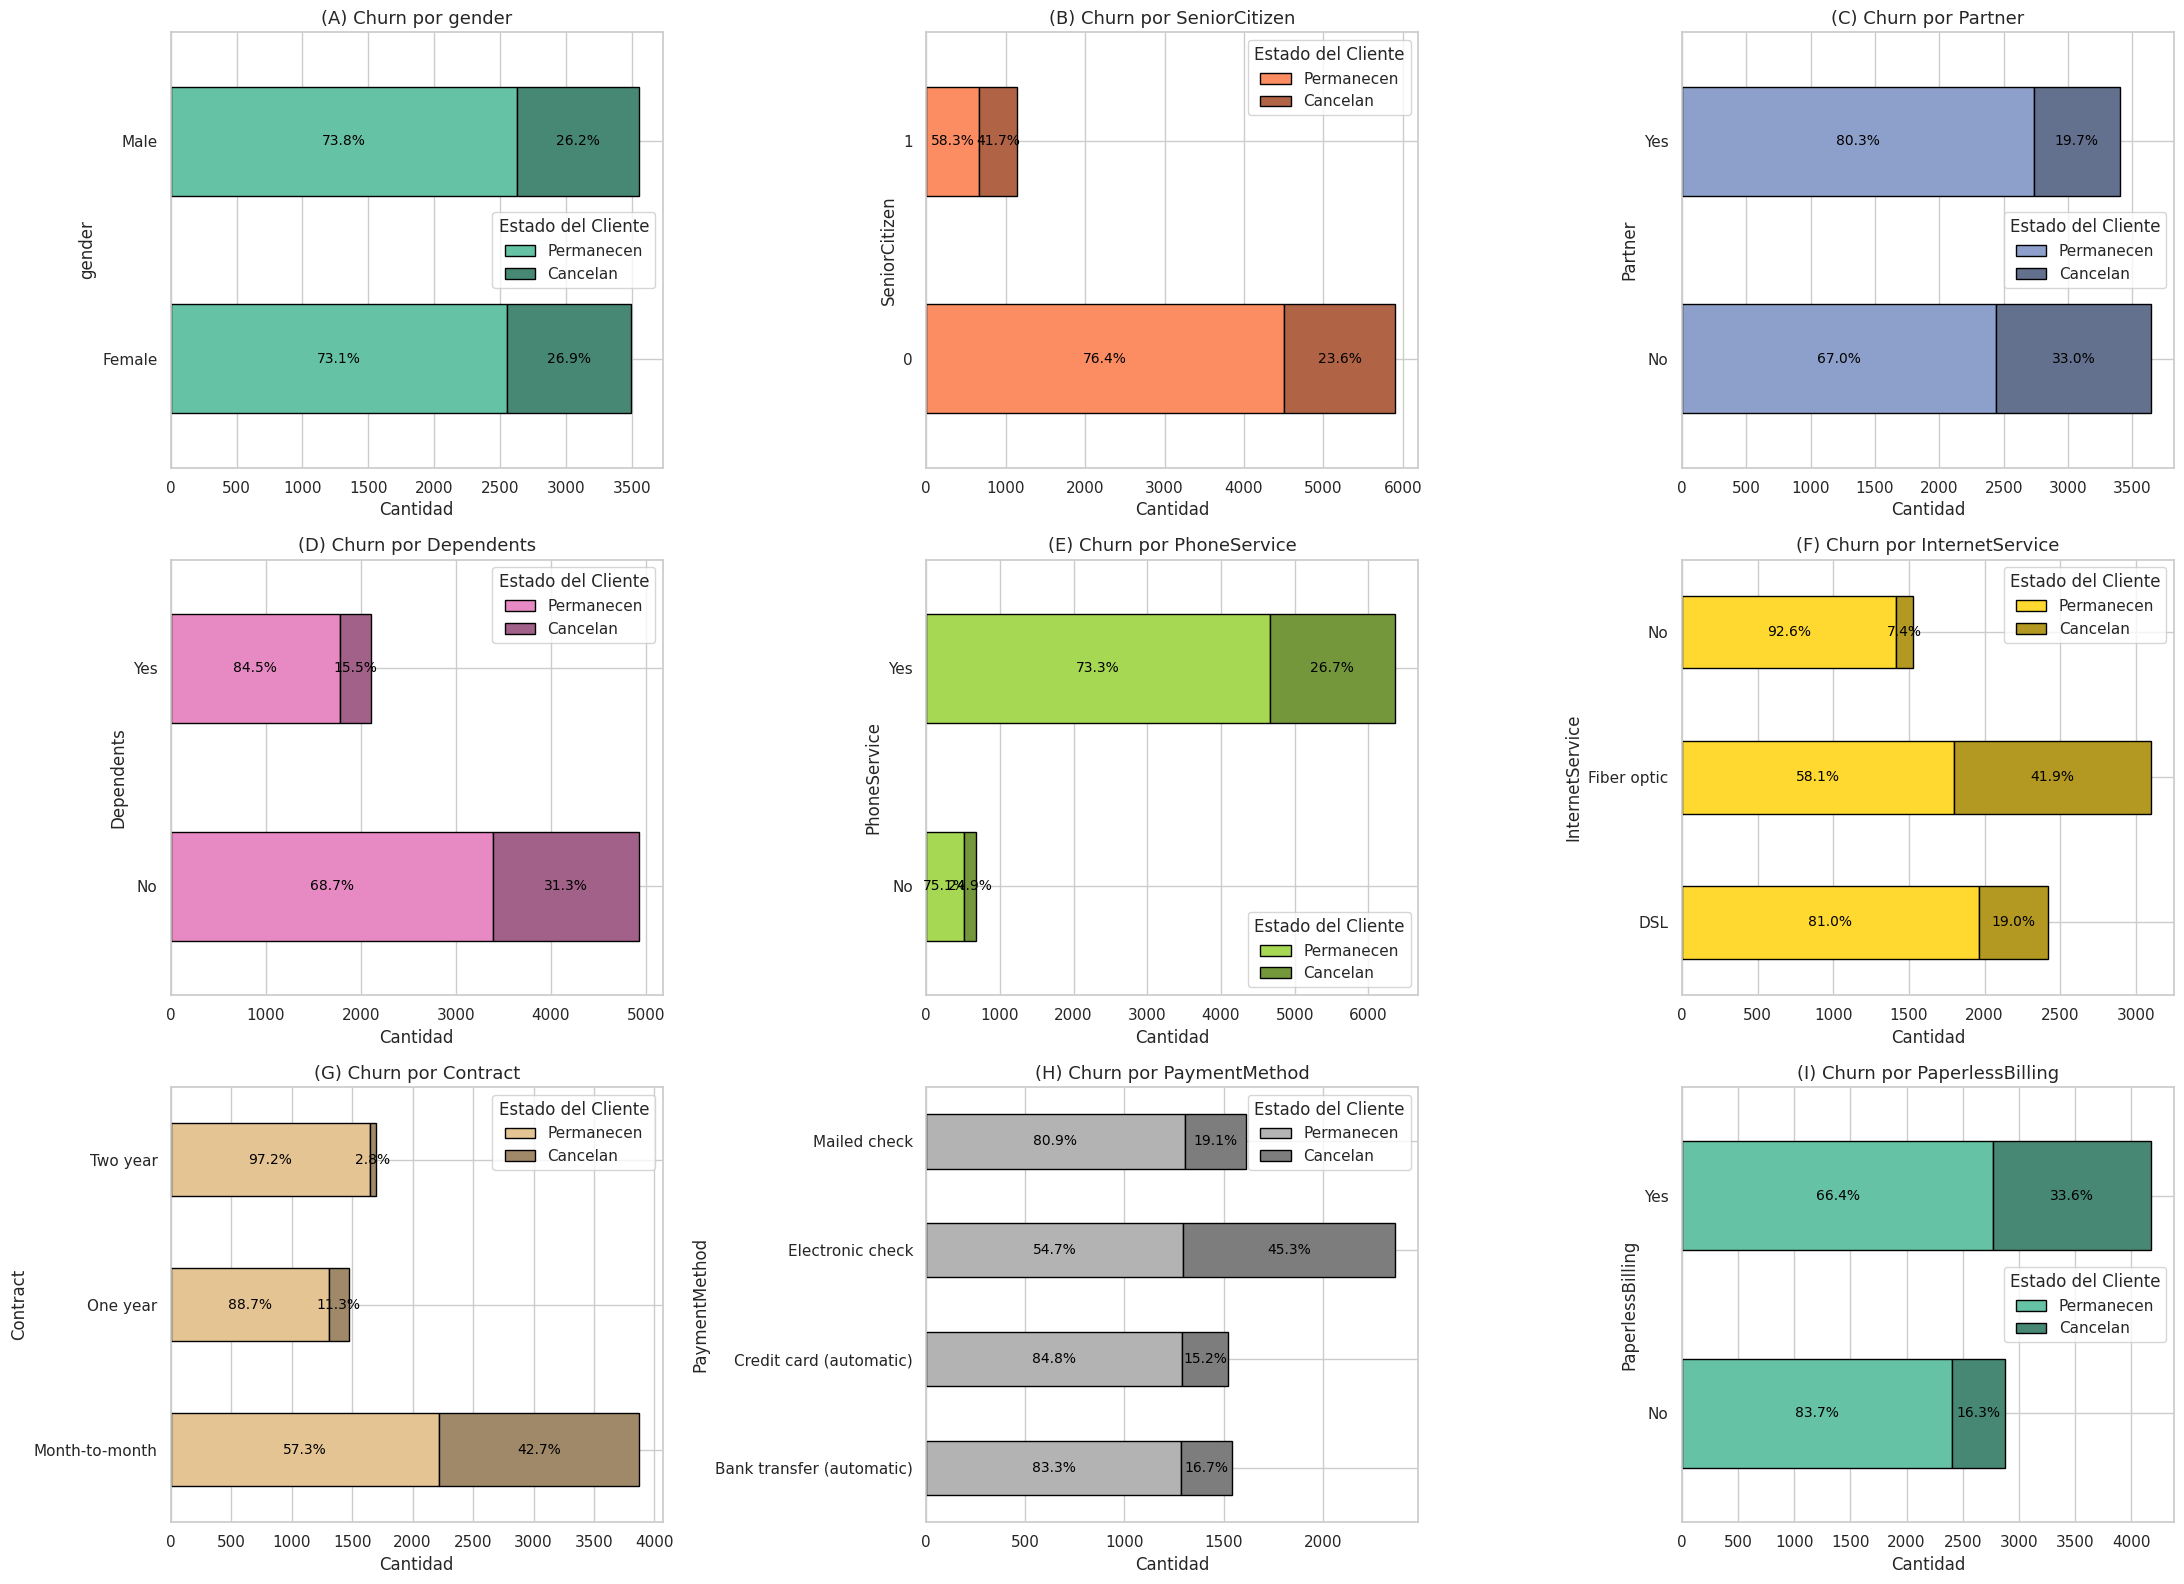

In [103]:
'''Distribución de evasión por variables categóricas'''

# Variables categóricas a analizar
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'InternetService', 'Contract',
    'PaymentMethod', 'PaperlessBilling'
]

# Letras para referenciar cada gráfico
subplot_labels = [chr(i) for i in range(65, 65 + len(categorical_columns))]  # 'A', 'B', ...

# Paleta de colores diferentes por gráfico
palette_list = sns.color_palette("Set2", len(categorical_columns))

# Estilo visual
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(22, 16))
axes = axes.flatten()

for idx, col in enumerate(categorical_columns):
    ax = axes[idx]

    # Agrupar y contar churn
    counts = df_churn.groupby([col, 'Churn']).size().unstack().fillna(0)
    counts.columns = ['Permanecen', 'Cancelan']

    # Calcular porcentajes por fila
    percent = counts.div(counts.sum(axis=1), axis=0) * 100

    # Colores personalizados
    color_a = palette_list[idx]
    color_b = tuple(np.clip(np.array(color_a) * 0.7, 0, 1))  # un tono más oscuro

    # Gráfico de barras horizontales apiladas
    counts[['Permanecen', 'Cancelan']].plot(
        kind='barh',
        stacked=True,
        color=[color_a, color_b],
        ax=ax,
        edgecolor='black'
    )

    # Título con letra
    ax.set_title(f"({subplot_labels[idx]}) Churn por {col}", fontsize=13)

    # Agregar etiquetas de porcentaje sobre las barras
    for i, (per, cnt) in enumerate(zip(percent.values, counts.values)):
        ax.text(cnt[0] / 2, i, f"{per[0]:.1f}%", va='center', ha='center', fontsize=10, color='black')
        ax.text(cnt[0] + cnt[1] / 2, i, f"{per[1]:.1f}%", va='center', ha='center', fontsize=10, color='black')

    ax.set_xlabel("Cantidad")
    ax.set_ylabel(col)
    ax.legend(title="Estado del Cliente", loc='best')

plt.tight_layout()
plt.show()


### 📊 Análisis de Evasión por Variables Categóricas

Con el objetivo de identificar perfiles de clientes con mayor propensión a cancelar el servicio, se exploró la distribución de la variable `Churn` según distintas variables categóricas. Para ello, se generaron gráficos de barras horizontales apiladas, cada uno con una letra identificadora para su referencia.

#### 🔍 Metodología:
- Se agruparon los datos por cada categoría y el estado de evasión (`Churn`).
- Se calculó el **porcentaje de clientes que permanecen y que cancelan** dentro de cada grupo.
- Se visualizaron los resultados con **colores amigables**, leyendas claras y etiquetas de porcentaje sobre las barras para facilitar la interpretación.

#### 🧩 Resultados clave:

- **(A) Género**: No hay diferencia significativa. La evasión es similar entre hombres (26.2%) y mujeres (26.9%).

- **(B) SeniorCitizen**: Los adultos mayores tienen una tasa de evasión **mucho más alta (41.7%)** comparado con los no mayores (23.6%).

- **(C) Partner**: Quienes no tienen pareja muestran una mayor evasión (33%) en contraste con los que sí tienen (19.7%).

- **(D) Dependents**: Los clientes con personas a cargo (hijos/dependientes) presentan una evasión más baja (15.5%) que los que no tienen (31.3%).

- **(E) PhoneService**: La diferencia es leve, pero quienes no tienen servicio telefónico tienen menor evasión (24.4%).

- **(F) InternetService**: Los usuarios con fibra óptica tienen una tasa de cancelación **muy alta (41.9%)**, lo que podría deberse a problemas de calidad o costo. En contraste, los que no tienen Internet casi no cancelan (7.4%).

- **(G) Contract**: Los clientes con contrato mensual presentan una evasión **muy elevada (42.7%)**, en comparación con contratos de un año (11.3%) o dos años (2.2%). Esto indica que los contratos a largo plazo retienen mejor a los clientes.

- **(H) PaymentMethod**: El método de pago también influye: el mayor churn está en quienes pagan con **cheque electrónico (45.3%)**, mientras que los que usan **tarjetas automáticas** tienen la menor tasa (15.2%).

- **(I) PaperlessBilling**: Los clientes con facturación electrónica tienen mayor evasión (33.6%) que los que no la usan (16.3%).

#### 📌 Conclusión:
Este análisis permitió identificar patrones relevantes en el comportamiento de cancelación. Factores como el tipo de contrato, método de pago, edad y situación familiar tienen un impacto importante en la tasa de evasión. Esta información será clave para diseñar estrategias de retención más efectivas en etapas posteriores del proyecto.


/tmp/ipython-input-1911714742.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No canceló", "Canceló"])
/tmp/ipython-input-1911714742.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No canceló", "Canceló"])
/tmp/ipython-input-1911714742.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No canceló", "Canceló"])
/tmp/ipython-input-1911714742.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No canceló", "Canceló"])


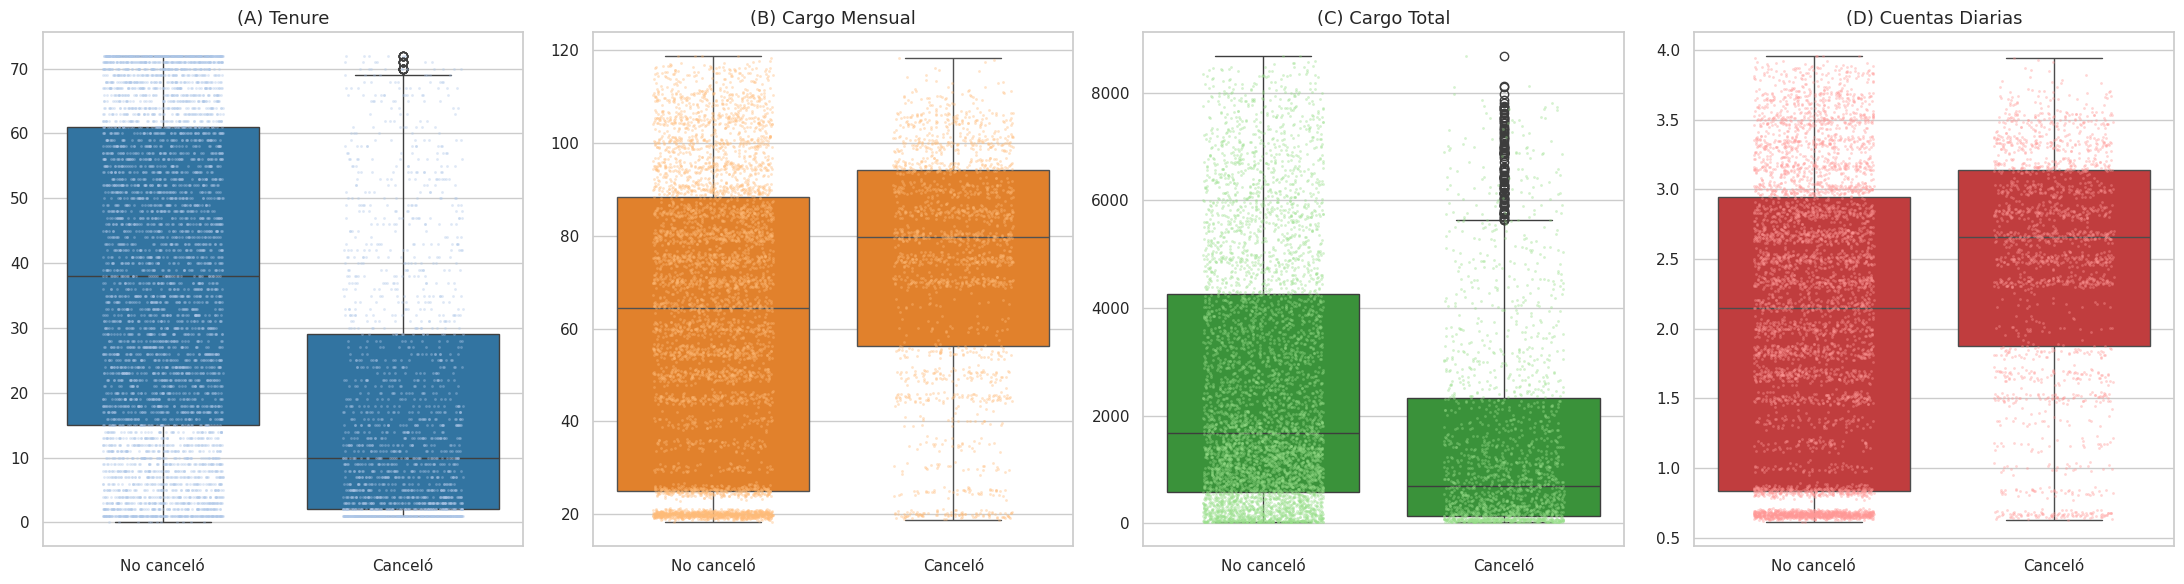

In [104]:
'''Distribución de evasión por variables numéricas'''

# Variables
num_vars = ["tenure", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]
titles = ["Tenure", "Cargo Mensual", "Cargo Total", "Cuentas Diarias"]

# Colores únicos por variable
box_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
strip_colors = ["#aec7e8", "#ffbb78", "#98df8a", "#ff9896"]

# Figura
fig, axes = plt.subplots(1, 4, figsize=(22, 6))

for i, (var, title) in enumerate(zip(num_vars, titles)):
    ax = axes[i]

    # Boxplot con un solo color por subplot
    sns.boxplot(
        data=df_churn,
        x="Churn",
        y=var,
        color=box_colors[i],
        ax=ax
    )

    # Stripplot más visible
    sns.stripplot(
        data=df_churn,
        x="Churn",
        y=var,
        color=strip_colors[i],
        size=2,
        jitter=0.25,
        alpha=0.4,
        ax=ax
    )

    ax.set_title(f"({chr(65+i)}) {title}", fontsize=13)
    ax.set_xticklabels(["No canceló", "Canceló"])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

In [105]:
"P valores para cada variable numérica"

for var in num_vars:
    grupo0 = df_churn[df_churn["Churn"] == 0][var]
    grupo1 = df_churn[df_churn["Churn"] == 1][var]
    stat, p = ttest_ind(grupo0, grupo1, equal_var=False)
    print(f"{var} → p-value = {p:.4f}")

# Charges.total presenta valores nan, por ende vamos a eliminarlos para conocer p-valor

grupo0 = df_churn[df_churn["Churn"] == 0]["Charges.Total"].dropna()
grupo1 = df_churn[df_churn["Churn"] == 1]["Charges.Total"].dropna()

stat, p = ttest_ind(grupo0, grupo1, equal_var=False)
print(f"Charges.Total → p-value corregido = {p:.4f}")


tenure → p-value = 0.0000
Charges.Monthly → p-value = 0.0000
Charges.Total → p-value = 0.0000
Cuentas_Diarias → p-value = 0.0000
Charges.Total → p-value corregido = 0.0000


### 📊 Análisis de variables numéricas frente a evasión de clientes

En este paso, se analizaron las **variables numéricas** del conjunto de datos —como `tenure` (tiempo de contrato), `Charges.Monthly`, `Charges.Total` y `Cuentas_Diarias`— para observar **cómo se distribuyen entre los clientes que cancelaron (evasión) y los que no**.

Se utilizaron **boxplots con puntos individuales**, lo cual permitió visualizar la dispersión y diferencias de distribución en cada grupo. Además, se aplicaron **pruebas estadísticas (t-tests)** para confirmar si las diferencias observadas eran estadísticamente significativas.

#### 🧪 Resultados principales:
- Los clientes que **cancelaron** tienden a tener **menor antigüedad (`tenure`)**.
- Pagan, en promedio, **más por mes** (`Charges.Monthly`).
- Han gastado **menos en total** (`Charges.Total`), lo cual es coherente con su menor tiempo en la empresa.
- Tienen una **mayor cantidad de cuentas por día** (`Cuentas_Diarias`), lo que podría asociarse a un uso más intensivo.

Todas estas variables mostraron **p-valores < 0.05**, lo que indica que las diferencias entre los grupos son **estadísticamente significativas**.

👉 Este análisis aporta **insights clave**: ciertos rangos de valores numéricos están más asociados a la evasión, lo que permite identificar **factores de riesgo** y anticipar posibles cancelaciones.


# Paso EXTRA

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


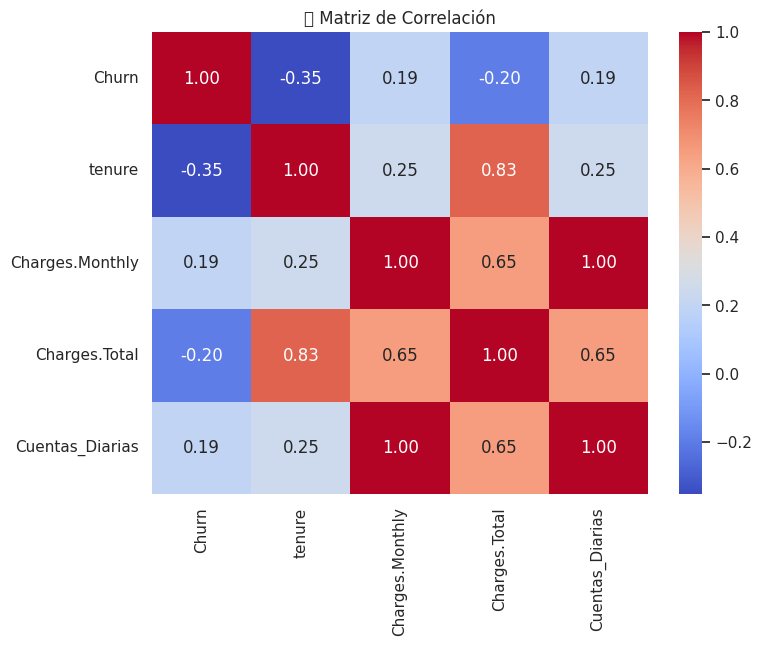

In [106]:
'''Matriz de correlación'''

# Selección de variables numéricas relevantes
num_corr_vars = ["Churn", "tenure", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]

# Matriz de correlación
corr_matrix = df_churn[num_corr_vars].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📈 Matriz de Correlación")
plt.show()


## 🔍 Análisis de Correlación entre Variables

Se calculó la matriz de correlación entre las variables numéricas principales del dataset, incluyendo `Churn`. El objetivo fue identificar qué variables están más asociadas entre sí y con la evasión de clientes.

La matriz muestra lo siguiente:

- **`tenure` tiene una correlación negativa con `Churn` (-0.35)**: los clientes que han estado más tiempo con la empresa tienden a no cancelar.
- **`Charges.Total` también muestra una correlación negativa con `Churn` (-0.20)**: tiene sentido, ya que quienes han pagado más en total suelen tener mayor antigüedad.
- **`Charges.Monthly` y `Cuentas_Diarias` tienen correlaciones positivas con `Churn` (+0.19)**: los clientes con costos más altos por mes o por día tienden levemente a cancelar más.
- Las variables `Charges.Monthly`, `Charges.Total` y `Cuentas_Diarias` están fuertemente correlacionadas entre sí (> 0.65), por lo que representan aspectos similares del gasto.

📌 **Conclusión**:  
Este análisis ayuda a seleccionar las variables más informativas y no redundantes para futuros modelos predictivos. Variables como `tenure` y `Cuentas_Diarias` son buenos candidatos para ser predictores clave del churn.

📷 *Visualización: Matriz de correlación con anotaciones sobre la intensidad de cada relación.*


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


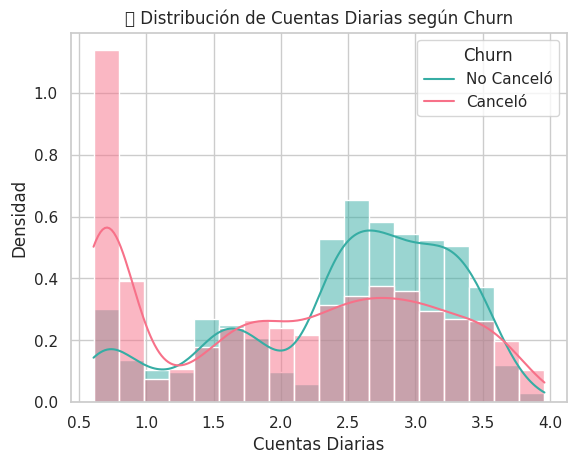

In [107]:
'''Relación entre Cuentas diarias y churn'''

sns.histplot(data=df_churn, x="Cuentas_Diarias", hue="Churn", kde=True, stat="density", palette="husl", common_norm=False)
plt.title("📊 Distribución de Cuentas Diarias según Churn")
plt.xlabel("Cuentas Diarias")
plt.ylabel("Densidad")
plt.legend(title="Churn", labels=["No Canceló", "Canceló"])
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


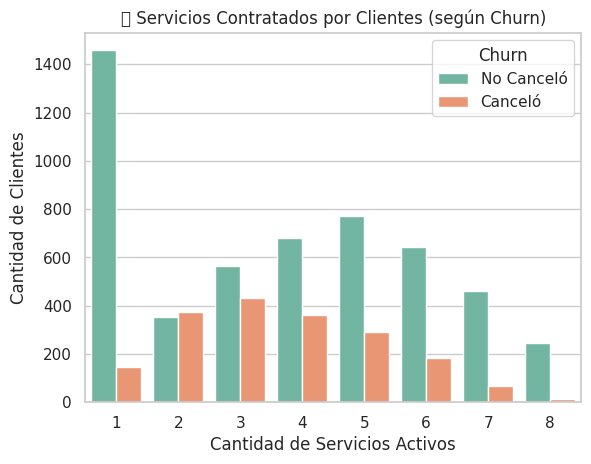

In [108]:
''' Cálculo productos activos '''
# Contar cantidad de servicios contratados
df_churn["Servicios_Activos"] = (
    (df_churn["PhoneService"] == "Yes").astype(int) +
    (df_churn["InternetService"] != "No").astype(int) +
    (df_churn["OnlineSecurity"] == "Yes").astype(int) +
    (df_churn["OnlineBackup"] == "Yes").astype(int) +
    (df_churn["DeviceProtection"] == "Yes").astype(int) +
    (df_churn["TechSupport"] == "Yes").astype(int) +
    (df_churn["StreamingTV"] == "Yes").astype(int) +
    (df_churn["StreamingMovies"] == "Yes").astype(int)
)

# Servicios activos vs churn
sns.countplot(data=df_churn, x="Servicios_Activos", hue="Churn", palette="Set2")
plt.title("🔢 Servicios Contratados por Clientes (según Churn)")
plt.xlabel("Cantidad de Servicios Activos")
plt.ylabel("Cantidad de Clientes")
plt.legend(title="Churn", labels=["No Canceló", "Canceló"])
plt.show()

## 🔍 Análisis adicional: Correlaciones y variables asociadas al Churn

### 📈 Cuentas Diarias vs Churn

Para explorar la relación entre el número de **cuentas diarias** y la cancelación del servicio, se utilizó un gráfico de densidad que permite observar la distribución de esta variable según el estado de churn.

- **Clientes que cancelaron** tienden a concentrarse en niveles bajos de cuentas diarias, especialmente en valores cercanos a 0.6–1.0.
- En cambio, **clientes que no cancelaron** presentan una mayor densidad entre valores medios-altos de cuentas diarias (2.5–3.5).

Este comportamiento sugiere que:
> 🔎 **A mayor cantidad de cuentas diarias, menor es la probabilidad de churn.**

---

### 📊 Servicios contratados vs Churn

También se analizó cómo influye la cantidad de **servicios activos** contratados en la probabilidad de cancelación. El gráfico de barras muestra la distribución de clientes según la cantidad de servicios y su estado de churn.

**Principales hallazgos:**
- Los clientes con **solo 1 o 2 servicios** presentan una **alta proporción de cancelación**.
- A partir de **4 o más servicios**, la mayoría de los clientes **no cancelan**.
- La proporción de churn disminuye de forma consistente conforme aumenta el número de servicios contratados.

Esto indica que:
> 💡 **Fomentar la contratación de múltiples servicios puede fortalecer la retención de clientes.**

---

### 📌 Conclusión de este análisis adicional

Ambas variables (cuentas diarias y número de servicios activos) muestran una **relación inversa con el churn**, lo que sugiere que podrían ser **factores protectores** frente a la cancelación. Estos resultados pueden ser claves para diseñar **estrategias de fidelización** más efectivas y también para alimentar futuros **modelos predictivos de churn**.


# 🧠 Informe Final: Análisis de Evasión de Clientes (Churn)

## 📌 Introducción

El presente análisis tiene como objetivo identificar los factores que influyen en la **evasión de clientes (Churn)** en una empresa de telecomunicaciones. El churn representa un reto estratégico, ya que la pérdida de clientes impacta directamente en los ingresos y la sostenibilidad del negocio. Mediante análisis estadísticos y visualizaciones, buscamos comprender el comportamiento de los clientes y detectar patrones que puedan anticipar la cancelación del servicio.

---

## 🧼 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos para preparar los datos:

- **Importación del dataset** con pandas.
- Conversión de variables numéricas mal tipadas (como `TotalCharges`) al tipo correcto.
- Imputación de valores nulos y exclusión de registros incompletos.
- Creación de nuevas variables útiles para el análisis, como `Cuentas_Diarias` (promedio de cargos diarios).
- Conversión de la variable `Churn` a formato categórico.

Este proceso permitió contar con una base de datos limpia y lista para análisis exploratorios y estadísticos.

---

## 📊 Análisis Exploratorio de Datos

Se exploraron las principales variables numéricas del dataset, diferenciando entre clientes que **cancelaron** y los que **no cancelaron**.

### Variables Numéricas y Churn

Se realizó un análisis comparativo con histogramas y pruebas estadísticas (test de Mann-Whitney):

- **Tenure (tiempo de contrato)**: Los clientes que cancelaron tienen, en promedio, un menor tiempo de permanencia.
- **Charges.Monthly (cargo mensual)**: Quienes cancelan tienden a tener cargos mensuales ligeramente más altos.
- **Charges.Total (total gastado)**: Aquellos que permanecen han acumulado un gasto total mayor, coherente con su mayor permanencia.
- **Cuentas_Diarias**: Los clientes que no cancelan presentan mayores valores diarios en promedio.

Estos resultados son respaldados por valores p significativamente bajos (p-value < 0.05), lo que sugiere diferencias estadísticamente significativas entre los grupos.

### 🔁 Matriz de Correlación

Se evaluó la relación entre variables numéricas y `Churn` mediante una matriz de correlación:

- `tenure` y `Charges.Total` presentan **correlación negativa con Churn**, lo que indica que mayor permanencia o gasto total se asocia con menor evasión.
- `Charges.Monthly` y `Cuentas_Diarias` tienen **correlaciones positivas pero bajas** con Churn.

---

## 📈 Análisis Adicional: Cuentas Diarias y Servicios Contratados

### Cuentas Diarias vs Churn

Se analizó la variable `Cuentas_Diarias` usando un gráfico de densidad:

- Clientes que cancelan tienden a tener **menores cuentas diarias**.
- Clientes que no cancelan presentan **picos entre 2.5 y 3.5**.

✅ **Interpretación**: un mayor gasto diario está asociado a mayor permanencia, lo cual puede indicar mayor uso o satisfacción con los servicios.

### Servicios Contratados vs Churn

Se analizó cómo influye el número de servicios contratados:

- Clientes con **solo 1 o 2 servicios** tienen altas tasas de churn.
- A mayor cantidad de servicios activos, **menor la proporción de cancelación**.

✅ **Interpretación**: los clientes con más servicios tienen mayor compromiso o dependencia con la empresa, reduciendo la probabilidad de cancelar.

---

## 💡 Conclusiones e Insights

- El **tiempo de permanencia (tenure)** es uno de los factores más fuertemente asociados a la cancelación. Clientes nuevos son más propensos a irse.
- El **gasto total acumulado** también está relacionado con la permanencia.
- Clientes con **más cuentas diarias y más servicios contratados** tienen menor probabilidad de churn.
- La combinación de estos factores puede ser utilizada para segmentar a los clientes en riesgo y anticipar posibles cancelaciones.

---

## 🎯 Recomendaciones Estratégicas

1. **Estrategias de retención temprana**: diseñar campañas para fidelizar a los nuevos clientes durante los primeros meses.
2. **Bundles o paquetes integrales**: fomentar la contratación de múltiples servicios para aumentar la permanencia.
3. **Monitoreo de cuentas diarias**: clientes con bajo gasto diario podrían ser un grupo de riesgo, ideal para intervenciones proactivas.
4. **Programas de lealtad**: premiar la antigüedad y el gasto acumulado puede incentivar la permanencia.

---

🚀 Este análisis sienta las bases para la creación de **modelos predictivos de churn**, permitiendo a la empresa anticiparse y actuar con inteligencia sobre sus datos.


## Exportar el dataset tratato para la parte 2

In [113]:
# Exportar el dataset tratado correcto
df_churn.to_csv("telecom_tratado.csv", index=False)
print("✅ Exportado telecom_treated.csv con 7043 filas y 23 columnas")


✅ Exportado telecom_treated.csv con 7043 filas y 23 columnas
